### Bibliotecas

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Tornar os números mais legiveis
pd.options.display.float_format = '{:20.2f}'.format

# Mostrar todas as colunas
pd.set_option('display.max_columns', 999)

### Análise Exploratória

In [90]:
df = pd.read_excel("data/online_retail_II.xlsx", sheet_name=0)

In [ ]:
df.head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [ ]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,525461.00,525461,525461.00,417534.00
mean,10.34,2010-06-28 11:37:36.845017856,4.69,15360.65
min,-9600.00,2009-12-01 07:45:00,-53594.36,12346.00
25%,1.00,2010-03-21 12:20:00,1.25,13983.00
50%,3.00,2010-07-06 09:51:00,2.10,15311.00
75%,10.00,2010-10-15 12:45:00,4.21,16799.00
max,19152.00,2010-12-09 20:01:00,25111.09,18287.00
std,107.42,NaN,146.13,1680.81


In [ ]:
df.describe(include='O')

,Invoice,StockCode,Description,Country
count,525461,525461,522533,525461
unique,28816,4632,4681,40
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,675,3516,3549,485852


##### Customer ID

In [ ]:
df[df['Customer ID']. isna()].head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom


Como estamos fazendo um estudo sobre o hábito dos consumidores, entradas que não possuem um 'Customer ID' serão eliminadas do banco de dados


##### Quantity

In [ ]:
df[df["Quantity"] < 0].head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.00,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.00,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.00,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.00,Australia


Como não faz sentido um item ser vendido uma quantidade negativa de vezes, essas entradas também serão removidas do banco de dados

##### Invoice

Sobre a coluna "Invoice", ela corresponde ao número da fatura, um valor único para cada pedido. É composta de 6 digitos numéricos, podendo conter a letra 'C' no início, indicando um cancelamento. Vamos verificar se todas as observações estão de acordo com essa regra.

In [ ]:
df["Invoice"] = df["Invoice"].astype("str")
df[df["Invoice"].str.match("^\\d{6}$") == False].head()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.00,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.00,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.00,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.00,Australia


In [ ]:
df["Invoice"] = df["Invoice"].astype("str")

df[df["Invoice"].str.match("^\\d{6}$") == False].head()
# usando expressões regex, estamos verificando se a string começa (^) com 6 digitos 
# (\\d) e termina com apenas esses digitos e mais nenhum caractere.

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.00,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.00,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.00,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.00,Australia


Percebemos que existem valores com a letra "C" no início do número da fatura, mas para verificar se existem outros casos, podemos remover os digitos númericos [0-9] e verificar quantos valores únicos existem, se todos os dados estiverem seguindo as regras, devemos ter apenas os valores ["", "C"].

In [ ]:
df["Invoice"].str.replace("[0-9]", "", regex=True).unique()
# novamente usando regex, acessamos o atributo string do objeto DataFrame, 
# e substituimos, na string, os valores de 0 a 9 pela string vazia (""), e contamos quantos
# valores são únicos

array(['', 'C', 'A'], dtype=object)

In [ ]:
df[df["Invoice"].str.contains("A")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom


Percebemos que existem valores de "Invoice" que contém o caractere "A", observando esses valores, percebemos que todos possuem o "CustomerID" = NaN, logo serão rertirados do banco de dados.

##### StockCode

A variável "StockCode" é um numério inteiro único de 5 digitos para cada produto distinto

In [ ]:
df["StockCode"] = df["StockCode"].astype('str')

df[df['StockCode'].str.match("^\\d{5}$") == False].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
12,489436,48173C,DOOR MAT BLACK FLOCK,10,2009-12-01 09:06:00,5.95,13078.00,United Kingdom
23,489436,35004B,SET OF 3 BLACK FLYING DUCKS,12,2009-12-01 09:06:00,4.65,13078.00,United Kingdom
28,489436,84596F,SMALL MARSHMALLOWS PINK BOWL,8,2009-12-01 09:06:00,1.25,13078.00,United Kingdom


Existem outros 'StockCode's que possuem mais de cinco digitos numéricos, verificando todos que existem, temos:

In [ ]:
df[(df['StockCode'].str.match("^\\d{5}$") == False) &
   (df['StockCode'].str.match("^\\d{5}[a-zA-Z]+$") == False)]['StockCode'].unique()
# estamos verificando em que situações os valores da variável StockCode não possui
# cinco digitos e não possui letras[a-zA-z] no final da string, o '+' serve para indicar que
# podem existir letras que se repetem

array(['POST', 'D', 'DCGS0058', 'DCGS0068', 'DOT', 'M', 'DCGS0004',
       'DCGS0076', 'C2', 'BANK CHARGES', 'DCGS0003', 'TEST001',
       'gift_0001_80', 'DCGS0072', 'gift_0001_20', 'DCGS0044', 'TEST002',
       'gift_0001_10', 'gift_0001_50', 'DCGS0066N', 'gift_0001_30',
       'PADS', 'ADJUST', 'gift_0001_40', 'gift_0001_60', 'gift_0001_70',
       'gift_0001_90', 'DCGSSGIRL', 'DCGS0006', 'DCGS0016', 'DCGS0027',
       'DCGS0036', 'DCGS0039', 'DCGS0060', 'DCGS0056', 'DCGS0059', 'GIFT',
       'DCGSLBOY', 'm', 'DCGS0053', 'DCGS0062', 'DCGS0037', 'DCGSSBOY',
       'DCGSLGIRL', 'S', 'DCGS0069', 'DCGS0070', 'DCGS0075', 'B',
       'DCGS0041', 'ADJUST2', '47503J ', 'C3', 'SP1002', 'AMAZONFEE'],
      dtype=object)

É necessário verificar todos esses casos.

In [ ]:
df[df["StockCode"].str.contains("^DOT")].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
2379,489597,DOT,DOTCOM POSTAGE,1,2009-12-01 14:28:00,647.19,NaN,United Kingdom
2539,489600,DOT,DOTCOM POSTAGE,1,2009-12-01 14:43:00,55.96,NaN,United Kingdom
2551,489601,DOT,DOTCOM POSTAGE,1,2009-12-01 14:44:00,68.39,NaN,United Kingdom
2571,489602,DOT,DOTCOM POSTAGE,1,2009-12-01 14:45:00,59.35,NaN,United Kingdom
2619,489603,DOT,DOTCOM POSTAGE,1,2009-12-01 14:46:00,42.39,NaN,United Kingdom


Nota:

StockCode deve seguir o padrão [0-9]{5} mas aparenta apresentar valores legítimos para o padrão [0-9]{5}[a-zA-Z]+
Além disso contém outros valores da forma:

| Código | Descrição | Ação | 
|---------|-------------|----------|
| DCGS | CustomerId nulo | Excluir| 
| D | Representa desconto de valores | Excluir | 
| DOT | Custo de postagem | Exclurir | 
| M ou m | Transações manuais | Excluir | 
| C2 | Custo de transporte (?) | Excluir | 
| C3 | Não sei, apenas uma transação | Excluir | 
| BANK CHARGES ou B | Tarifas de Banco | Excluir| 
| S | Amostras enviadas aos clientes | Excluir | 
| TESTXXX | Dados de teste, não é válido | Excluir | 
| gift__XXX | Compras com "gift cards" | Excluir | 
| PADS | Código de estoque para preenchimento | Incluir | 
| SP1002 | Pedidos especiais para itens, apenas 3 transações | Excluir| 
| AMAZONFEE | Taxa para transporte com a Amazon | Excluir |
| ADJUSTX | Ajuste manual feito pelos Adms | Excluir |

### Limpando o banco de dados

In [ ]:
cleaned_df = df.copy()

##### Invoice

In [ ]:
cleaned_df["Invoice"] = cleaned_df["Invoice"].astype('str')
# transformando todos os valores de "Invoice" em strings


# mask é usado como uma expressão para filtrar os dados no pandas!
mask = (
    cleaned_df["Invoice"].str.match("^\\d{6}$") == True
)

cleaned_df = cleaned_df[mask]
# queremos que cleaned_df seja um DataFrame que respeita as regras impostas pelo
# filtro "mask"

##### StockCode

In [ ]:
cleaned_df["StockCode"] = cleaned_df["StockCode"].astype("str")

# queremos os valores de "StockCode" que contenham 5 digitos, 5 digitos seguidos por
# letras, e que contenham o código "PADS". "|" serve com "ou"

mask = (
    (cleaned_df["StockCode"].str.match("^\\d{5}$") == True)
    | (cleaned_df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$"))
    | (cleaned_df["StockCode"].str.match("^PADS$"))
)

cleaned_df = cleaned_df[mask]

##### Customer ID

In [ ]:
cleaned_df.dropna(subset=["Customer ID"], inplace=True)

In [ ]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,407695.00,407695,407695.00,407695.00
mean,13.59,2010-07-01 10:10:10.782177792,3.29,15368.50
min,1.00,2009-12-01 07:45:00,0.00,12346.00
25%,2.00,2010-03-26 14:01:00,1.25,13997.00
50%,5.00,2010-07-09 15:46:00,1.95,15321.00
75%,12.00,2010-10-14 17:09:00,3.75,16812.00
max,19152.00,2010-12-09 20:01:00,10953.50,18287.00
std,96.84,NaN,34.76,1679.80


##### Price

Aparentam existir valores de preço iguais a zero nas transações.

In [ ]:
cleaned_df = cleaned_df[cleaned_df["Price"] > 0]

In [ ]:
cleaned_df["Price"].min()

0.001

Notamos que não existem preços de transações iguais a zero, mesmo que possuam valores muito pequenos, todas são maiores que zero, então serão mantidas no banco de dados.

In [ ]:
print(len(cleaned_df) / len(df))

0.7732429238325965


Após a limpeza dos dados, perdemos aproximadamente 23% dos dados.

### Features

As features que iremos utilizar para analisar os consumidores são as seguintes:

1. Recência (Tempo desde a última compra do cliente, levando em conta a data da última compra geral)
2. Frequência (Quantas vezes o consumidor comprou)
3. Valor monetário (Soma do total que um consumidor gastou) 

In [ ]:
cleaned_df["SalesLineTotal"] = cleaned_df["Quantity"] * cleaned_df["Price"]

In [ ]:
aggregated_df = cleaned_df.groupby(by =  "Customer ID", as_index = False) \
.agg(
  MonetaryValue = ("SalesLineTotal", "sum"),
  Frequency = ("Invoice", "nunique"),
  LastInvoiceDate = ("InvoiceDate", "max")
)

aggregated_df.head()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate
0,12346.00,169.36,2,2010-06-28 13:53:00
1,12347.00,1323.32,2,2010-12-07 14:57:00
2,12348.00,221.16,1,2010-09-27 14:59:00
3,12349.00,2221.14,2,2010-10-28 08:23:00
4,12351.00,300.93,1,2010-11-29 15:23:00


In [ ]:
max_invoice_date = aggregated_df["LastInvoiceDate"].max()

aggregated_df["Recency"] = (
    max_invoice_date - aggregated_df['LastInvoiceDate']).dt.days 

aggregated_df.head()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
0,12346.00,169.36,2,2010-06-28 13:53:00,164
1,12347.00,1323.32,2,2010-12-07 14:57:00,2
2,12348.00,221.16,1,2010-09-27 14:59:00,73
3,12349.00,2221.14,2,2010-10-28 08:23:00,42
4,12351.00,300.93,1,2010-11-29 15:23:00,10


##### Distribuição das variáveis

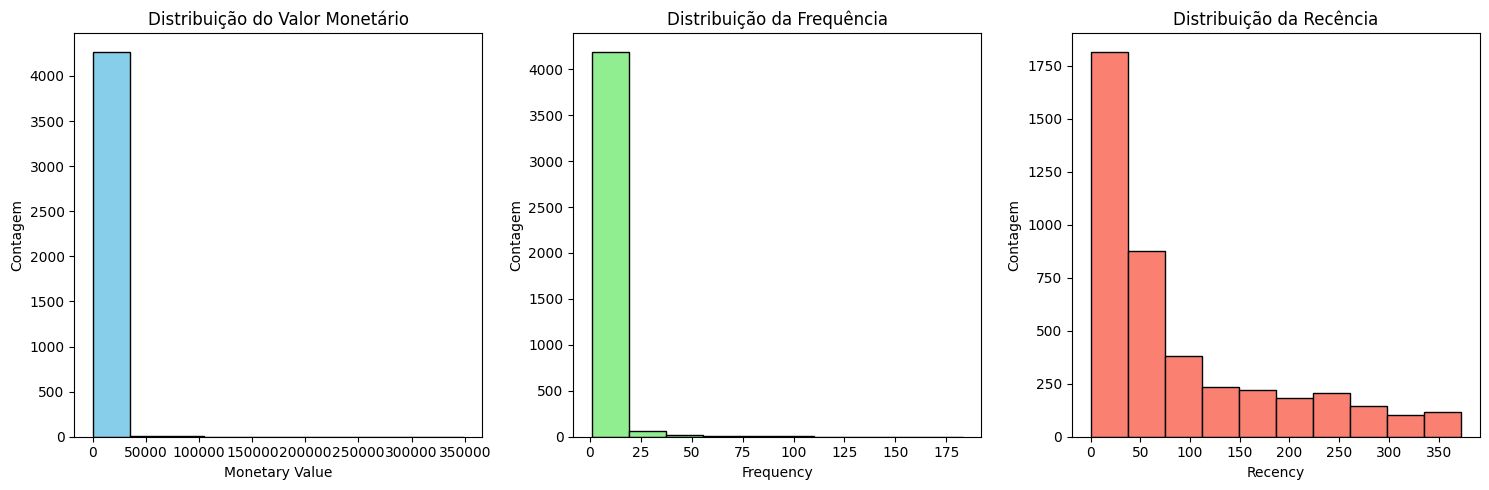

In [25]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.hist(aggregated_df["MonetaryValue"], bins=10, color='skyblue', edgecolor='black')
plt.title("Distribuição do Valor Monetário")
plt.xlabel('Monetary Value')
plt.ylabel('Contagem')

plt.subplot(1,3,2)
plt.hist(aggregated_df["Frequency"], bins=10, color='lightgreen', edgecolor='black')
plt.title("Distribuição da Frequência")
plt.xlabel('Frequency')
plt.ylabel('Contagem')


plt.subplot(1,3,3)
plt.hist(aggregated_df["Recency"], bins=10, color='Salmon', edgecolor='black')
plt.title("Distribuição da Recência")
plt.xlabel('Recency')
plt.ylabel('Contagem')

plt.tight_layout()
plt.show()

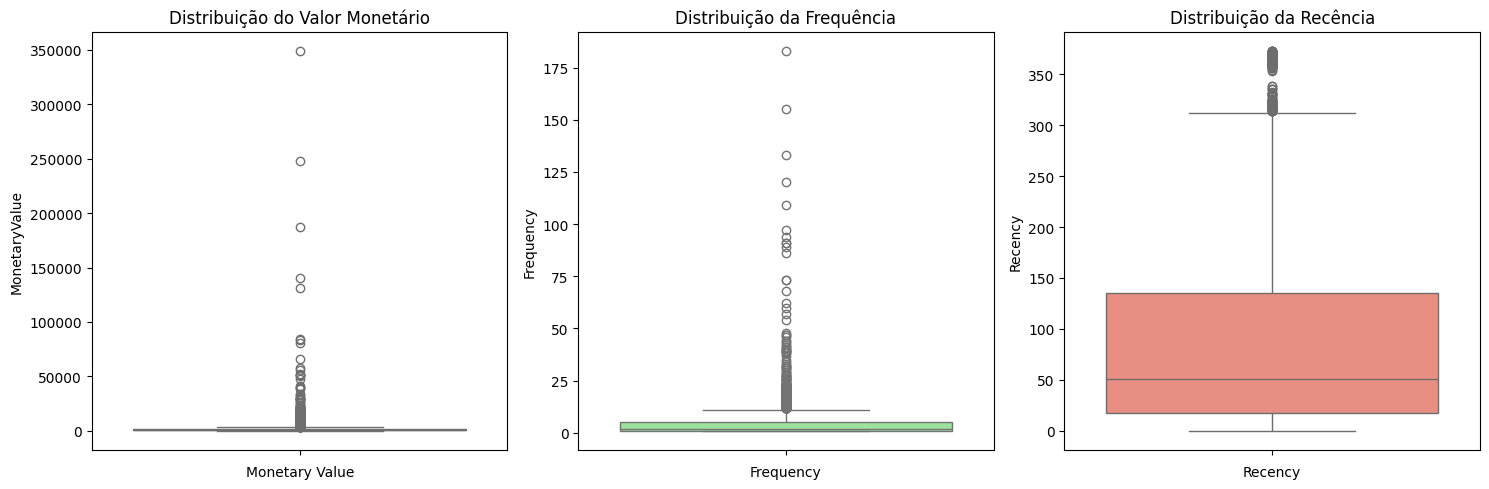

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot(data=aggregated_df["MonetaryValue"], color='skyblue')
plt.title("Distribuição do Valor Monetário")
plt.xlabel('Monetary Value')

plt.subplot(1,3,2)
sns.boxplot(data=aggregated_df["Frequency"], color='lightgreen')
plt.title("Distribuição da Frequência")
plt.xlabel('Frequency')


plt.subplot(1,3,3)
sns.boxplot(data=aggregated_df["Recency"], color='Salmon')
plt.title("Distribuição da Recência")
plt.xlabel('Recency')

plt.tight_layout()
plt.show()

##### Criando dataframe para os outliers

Devido a alta quantidade de outliers no banco de dados, vamos separar os clientes que não são outliers dos que são. Seguiremos a definição de que um cliente é outlier se ele for > Q3 + 1.5 * IQR e se < Q1 - 1.5 * IQR

In [45]:
M_Q1 = aggregated_df['MonetaryValue'].quantile(0.25)
M_Q3 = aggregated_df['MonetaryValue'].quantile(0.75)
M_IQR = M_Q3 - M_Q1

monetary_outliers_df = aggregated_df[
  (aggregated_df["MonetaryValue"] > M_Q3 + 1.5 * M_IQR) | 
  (aggregated_df["MonetaryValue"] < M_Q1 - 1.5 * M_IQR)].copy()

monetary_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,423.00,423.00,423.00,423,423.00
mean,15103.04,12188.10,17.17,2010-11-09 12:26:02.978723328,30.04
min,12357.00,3802.04,1.00,2009-12-10 18:03:00,0.00
25%,13622.00,4605.94,8.00,2010-11-08 13:17:30,3.00
50%,14961.00,6191.32,12.00,2010-11-26 12:19:00,13.00
75%,16692.00,10273.24,18.00,2010-12-06 10:34:30,31.00
max,18260.00,349164.35,183.00,2010-12-09 19:32:00,364.00
std,1728.66,25830.85,19.73,NaN,51.54


In [44]:
F_Q1 = aggregated_df['Frequency'].quantile(0.25)
F_Q3 = aggregated_df['Frequency'].quantile(0.75)
F_IQR = F_Q3 - F_Q1

frequency_outliers_df = aggregated_df[
  (aggregated_df["Frequency"] > F_Q3 + 1.5 * F_IQR) | 
  (aggregated_df["Frequency"] < F_Q1 - 1.5 * F_IQR)].copy()

frequency_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,279.00,279.00,279.00,279,279.00
mean,15352.66,14409.71,23.81,2010-11-23 11:06:20.645161216,16.09
min,12437.00,1094.39,12.00,2010-05-12 16:51:00,0.00
25%,13800.00,4331.56,13.00,2010-11-20 13:14:30,2.00
50%,15465.00,6615.77,17.00,2010-12-02 10:46:00,7.00
75%,16828.50,11692.41,23.00,2010-12-07 11:08:30,19.00
max,18260.00,349164.35,183.00,2010-12-09 19:32:00,211.00
std,1748.43,31381.74,21.93,NaN,26.59


##### Criando dataframe para os não-outliers

In [48]:
non_outliers_df = aggregated_df[(
  ~aggregated_df.index.isin(monetary_outliers_df.index)) & 
  (~aggregated_df.index.isin(frequency_outliers_df.index))]

non_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,3809.00,3809.00,3809.00,3809,3809.00
mean,15376.48,885.50,2.86,2010-09-03 11:16:46.516146176,97.08
min,12346.00,1.55,1.00,2009-12-01 10:49:00,0.00
25%,13912.00,279.91,1.00,2010-07-08 14:48:00,22.00
50%,15389.00,588.05,2.00,2010-10-12 16:25:00,58.00
75%,16854.00,1269.05,4.00,2010-11-17 13:14:00,154.00
max,18287.00,3788.21,11.00,2010-12-09 20:01:00,373.00
std,1693.20,817.67,2.24,NaN,98.11


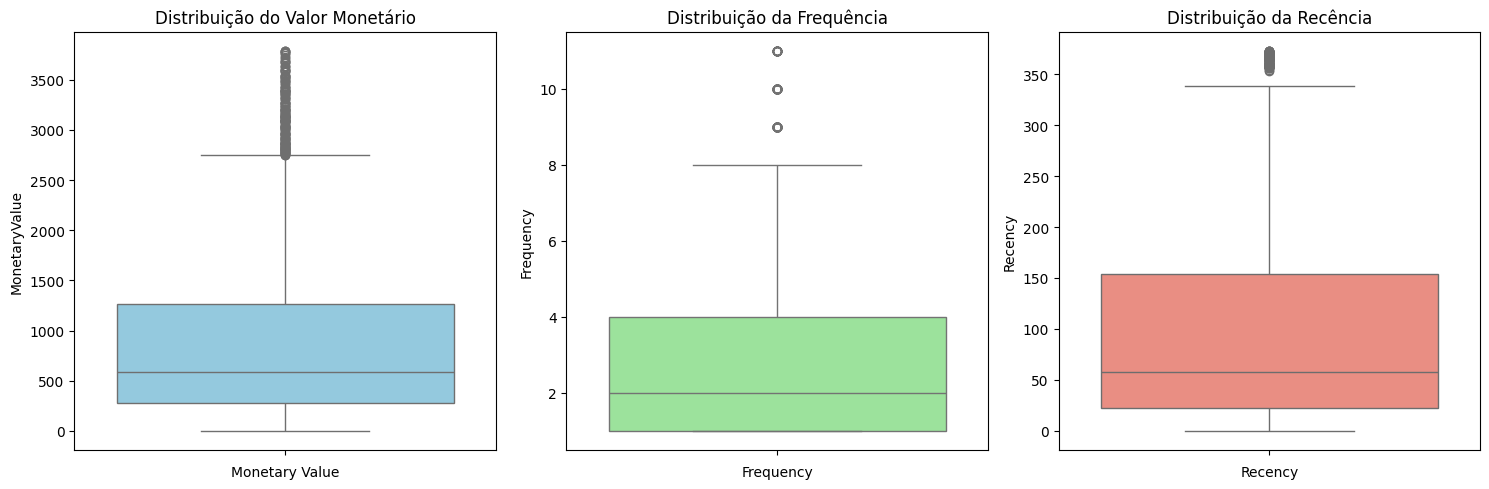

In [50]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot(data=non_outliers_df["MonetaryValue"], color='skyblue')
plt.title("Distribuição do Valor Monetário")
plt.xlabel('Monetary Value')

plt.subplot(1,3,2)
sns.boxplot(data=non_outliers_df["Frequency"], color='lightgreen')
plt.title("Distribuição da Frequência")
plt.xlabel('Frequency')


plt.subplot(1,3,3)
sns.boxplot(data=non_outliers_df["Recency"], color='Salmon')
plt.title("Distribuição da Recência")
plt.xlabel('Recency')

plt.tight_layout()
plt.show()

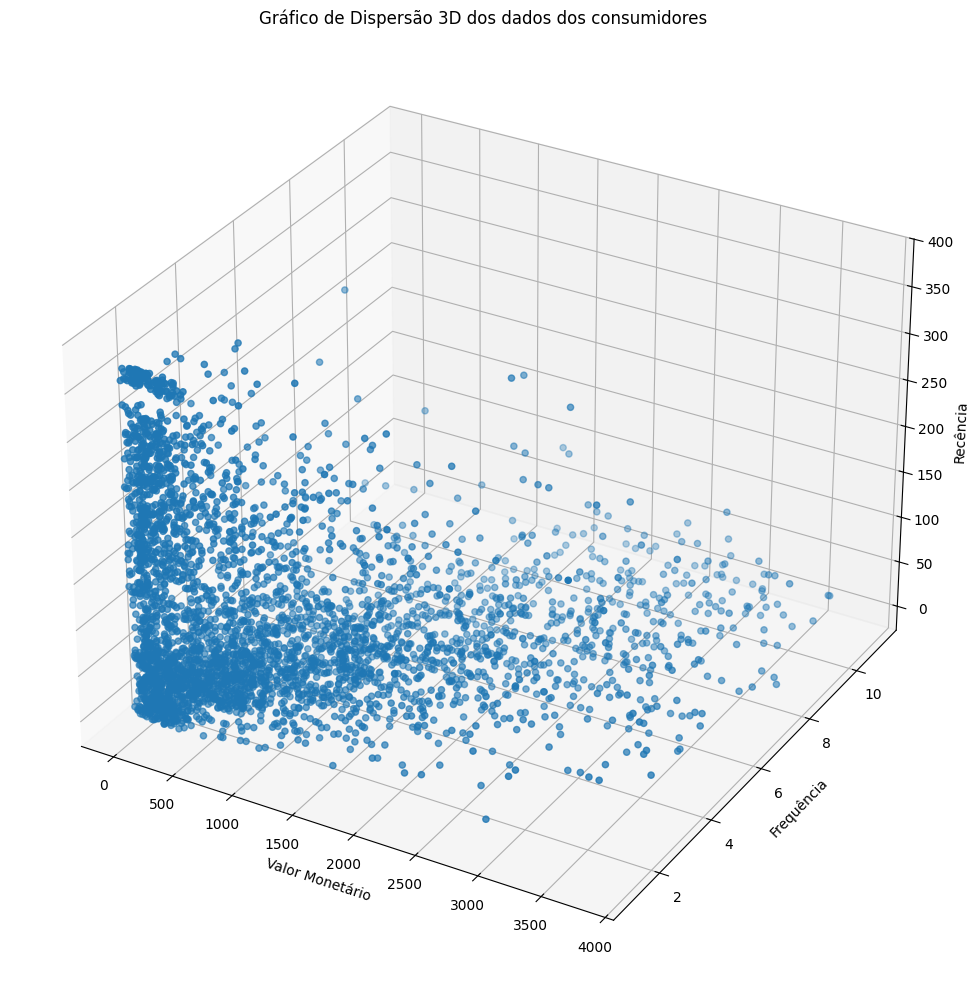

In [53]:
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(projection = "3d")

scatter = ax.scatter(
  non_outliers_df["MonetaryValue"],
  non_outliers_df["Frequency"],
  non_outliers_df["Recency"]
)

ax.set_xlabel('Valor Monetário')
ax.set_ylabel('Frequência')
ax.set_zlabel('Recência')

ax.set_title('Gráfico de Dispersão 3D dos dados dos consumidores')
plt.tight_layout()
plt.show()

##### Padronizando as variáveis

Como todas as escalas das variáveis estão diferentes, iremos padronizar as escalas, e, desta forma, não prejudicar a eficiência do modelo de agrupamento de k-médias.

In [56]:
scaler = StandardScaler()

scaled_data = scaler.fit_transform(
  non_outliers_df[["MonetaryValue", "Frequency", "Recency"]]
)

scaled_data = pd.DataFrame(scaled_data, index=non_outliers_df.index,
                           columns=("MonetaryValue", "Frequency", "Recency"))

scaled_data.head()

,MonetaryValue,Frequency,Recency
0,-0.88,-0.38,0.68
1,0.54,-0.38,-0.97
2,-0.81,-0.83,-0.25
3,1.63,-0.38,-0.56
4,-0.72,-0.83,-0.89


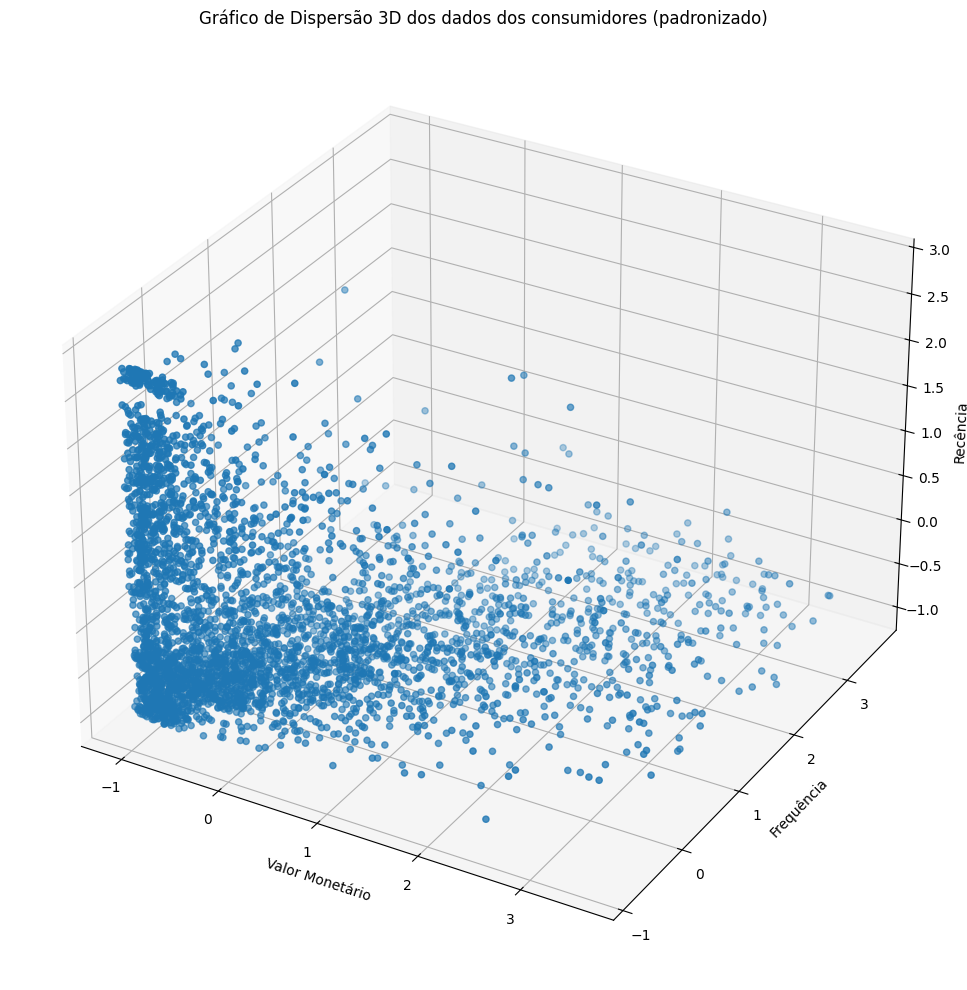

In [108]:
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(projection = "3d")

scatter = ax.scatter(
  scaled_data["MonetaryValue"],
  scaled_data["Frequency"],
  scaled_data["Recency"]
)

ax.set_xlabel('Valor Monetário')
ax.set_ylabel('Frequência')
ax.set_zlabel('Recência')

ax.set_title('Gráfico de Dispersão 3D dos dados dos consumidores (padronizado)')
plt.tight_layout()
plt.show()

### KMeans Clustering

Utilizaremos a medida Silhouette Score para decidir a quantidade de Clusters que serão utilizados. A medida pertence ao intervalo [-1, 1], de forma intuitiva, ela indica se existe uma grande interseção entre os dados dos diferentes clusters, o ideal é que não exista nenhuma interseção, ou seja, não exista nenhuma "silhueta" de dados uns sobre os outros. Quanto mais próximo de 1, menor a interseção entre os dados, ou seja, os clusters são mais distintos.

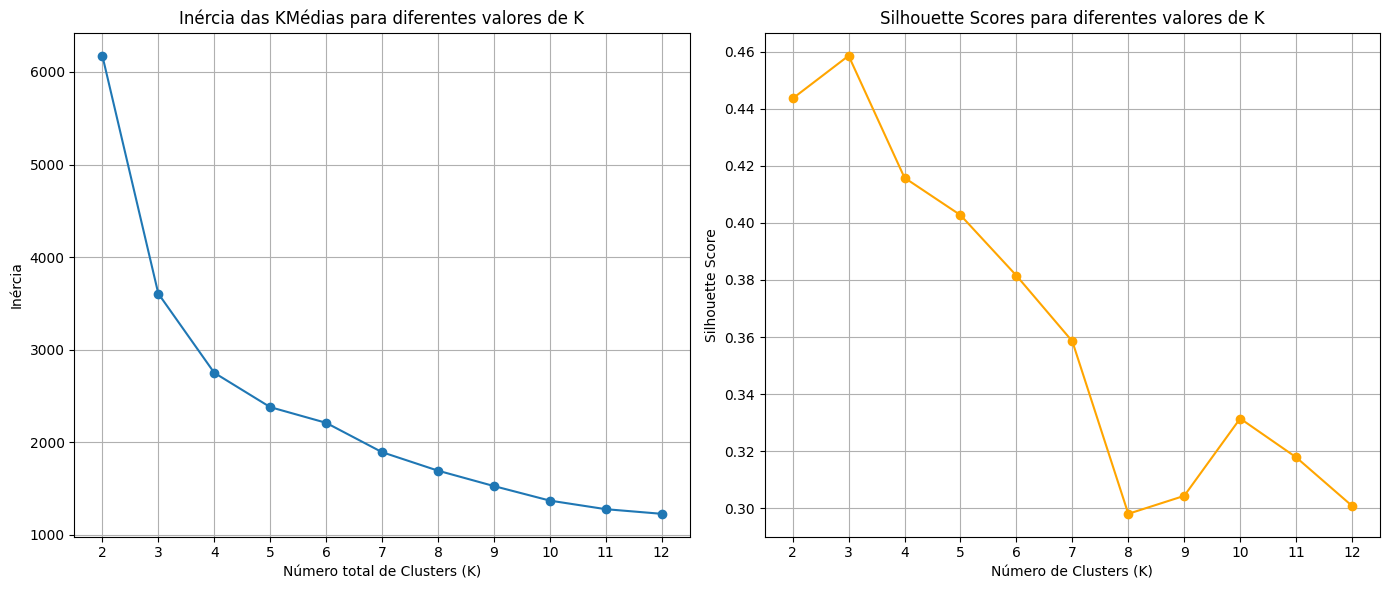

In [68]:
max_k = 12

inertia = []

silhouette_scores = []

k_values = range(2, max_k + 1)

for k in k_values:
  kmeans = KMeans(n_clusters=k, random_state=42, max_iter=1000)
  
  cluster_labels = kmeans.fit_predict(scaled_data)

  sil_score = silhouette_score(scaled_data, cluster_labels)

  silhouette_scores.append(sil_score)

  inertia.append(kmeans.inertia_)

plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plt.plot(k_values, inertia, marker='o')
plt.title("Inércia das KMédias para diferentes valores de K")
plt.xlabel('Número total de Clusters (K)')
plt.ylabel('Inércia')
plt.xticks(k_values)
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(k_values, silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Scores para diferentes valores de K')
plt.xlabel('Número de Clusters (K)')
plt.ylabel("Silhouette Score")
plt.xticks(k_values)
plt.grid(True)

plt.tight_layout()
plt.show()

Dessa forma, utilizaremos 4 clusters, visto que a inércia a partir do 4 cluster diminúi bastante, e o "Silhouette Score" com 4 clusters é maior do que com 5 clusters.

In [69]:
kmeans = KMeans(n_clusters=4, random_state=42, max_iter=1000)

cluster_labels = kmeans.fit_predict(scaled_data)

cluster_labels

array([1, 0, 2, ..., 1, 0, 0])

Adicionando, para cada observação no dataframe, o seu cluster correspondente:

In [109]:
non_outliers_df["Cluster"] = cluster_labels

C:\Users\moise\AppData\Local\Temp\ipykernel_7180\716382161.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_outliers_df["Cluster"] = cluster_labels


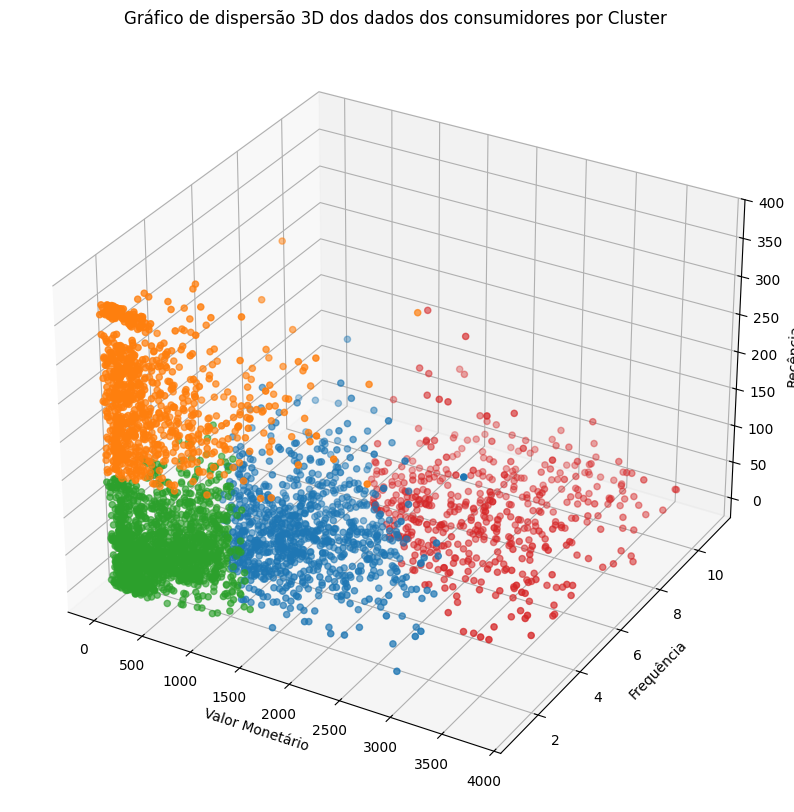

In [73]:
cluster_colors = {
  0: "#1f77b4",
  1: '#ff7f0e',
  2: '#2ca02c',
  3: '#d62728'
}

colors = non_outliers_df['Cluster'].map(cluster_colors)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(
  non_outliers_df["MonetaryValue"],
  non_outliers_df['Frequency'],
  non_outliers_df['Recency'],
  c=colors,
  marker='o'
)

ax.set_xlabel('Valor Monetário')
ax.set_ylabel('Frequência')
ax.set_zlabel('Recência')

ax.set_title('Gráfico de dispersão 3D dos dados dos consumidores por Cluster')

plt.tight_layout
plt.show()

### Analisando os Clusters

##### Clusters dos não-outliers

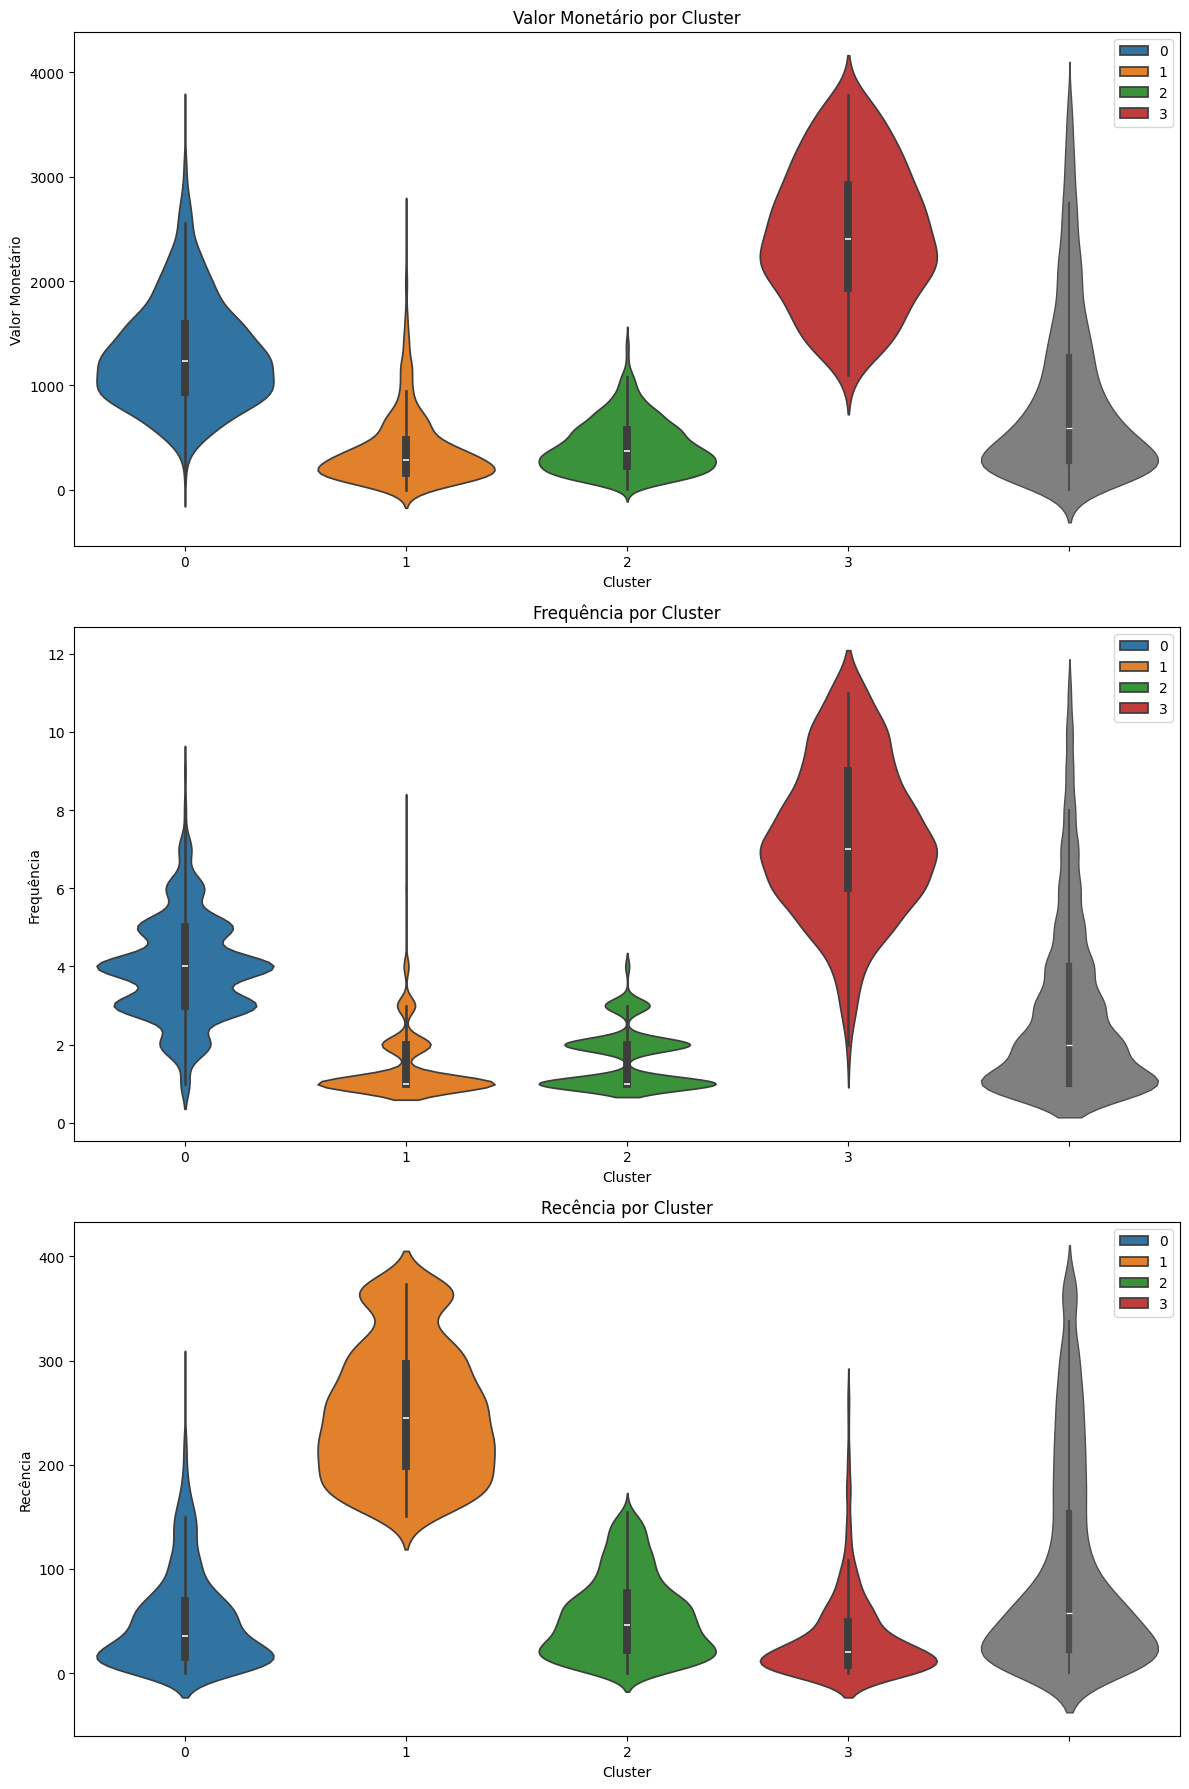

In [78]:
plt.figure(figsize=(12,18))

plt.subplot(3,1,1)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['MonetaryValue'],
               palette=cluster_colors, hue=non_outliers_df["Cluster"])
sns.violinplot(y=non_outliers_df['MonetaryValue'], color='gray', linewidth=1)
plt.title("Valor Monetário por Cluster")
plt.ylabel('Valor Monetário')

plt.subplot(3,1,2)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['Frequency'],
               palette=cluster_colors, hue=non_outliers_df["Cluster"])
sns.violinplot(y=non_outliers_df['Frequency'], color='gray', linewidth=1)
plt.title("Frequência por Cluster")
plt.ylabel('Frequência')

plt.subplot(3,1,3)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['Recency'],
               palette=cluster_colors, hue=non_outliers_df["Cluster"])
sns.violinplot(y=non_outliers_df['Recency'], color='gray', linewidth=1)
plt.title("Recência por Cluster")
plt.ylabel('Recência')

plt.tight_layout()
plt.show()

1. Grupo 0 (Azul): "Reter"
- Pensamento: Esse grupo inclui os clientes com alto gasto monetário que compram regularmente, mas não tao recentemente. O foco deve ser em reter esses clientes, buscando manter sua fidelidade e seu alto gasto monetário.
- Ação: Implementar programas de fidelidade, ofertas personalizadas e um engajamento constate para assegurar que clientes desse grupo se mantenham ativos.

2. Grupo 1 (Laranja): "Reengajar"
- Pensamento: Esse grupo inclui clientes com baixo gasto monetário, infrequentes e que não compraram recentemente. O foco deve ser em um reengajamento para traze-los de volta a um comportamento de compra ativo.
- Ação: Utilizar campanhas de marketing direcionadas, descontos especiais ou lembretes para encoraga-los a comprar novamente.

3. Grupo 2 (Verde): "Incetivar"
- Pensamento: Esse grupo representa os clientes com menor gasto monetário e com compras menos frequentes, porém, eles fizeram compras recentemente. Esses, talvez, sejam consumidores novos, ou talvez precisem de um incentivo para aumentar os seus engajamentos e seus gastos.
- Ação: Focar em construir relacionamento, prover um atendimento excelente e oferer promoções, ou iniciativas, para incentivar compras mais frequentes.

4. Grupo 3 (Vermelho): "Recompensar"
- Pensamento: Esse grupo inclui os clientes com maior gasto monetário, que são compradores muito frequentesm, os quais ainda estão comprando recentemente. São os clientes com maior fidelidade, e recompensar sua fidelidade é a chave para manter o seu engajamento.
- Ação: Implementar um programa de fidelidade robusto, prover ofertas excluisivas e reconhecer sua fidelidade para manter esses clientes engajados e satisfeitos.

##### Clusters dos outliers

In [88]:
overlap_indices = monetary_outliers_df.index.intersection(frequency_outliers_df.index)

monetary_only_outliers = monetary_outliers_df.drop(overlap_indices)
frequency_only_outliers = frequency_outliers_df.drop(overlap_indices)
monetary_and_frequency_outliers = monetary_outliers_df.loc[overlap_indices]

monetary_only_outliers["Cluster"] = -1
frequency_only_outliers["Cluster"] = -2
monetary_and_frequency_outliers["Cluster"] = -3

outlier_clusters_df = pd.concat([monetary_only_outliers, frequency_only_outliers, monetary_and_frequency_outliers])

outlier_clusters_df.head()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
9,12357.00,11229.99,1,2010-11-16 10:05:00,23,-1
25,12380.00,4782.84,4,2010-08-31 14:54:00,100,-1
42,12409.00,12346.62,4,2010-10-15 10:24:00,55,-1
48,12415.00,19468.84,4,2010-11-29 15:07:00,10,-1
61,12431.00,4145.52,11,2010-12-01 10:03:00,8,-1


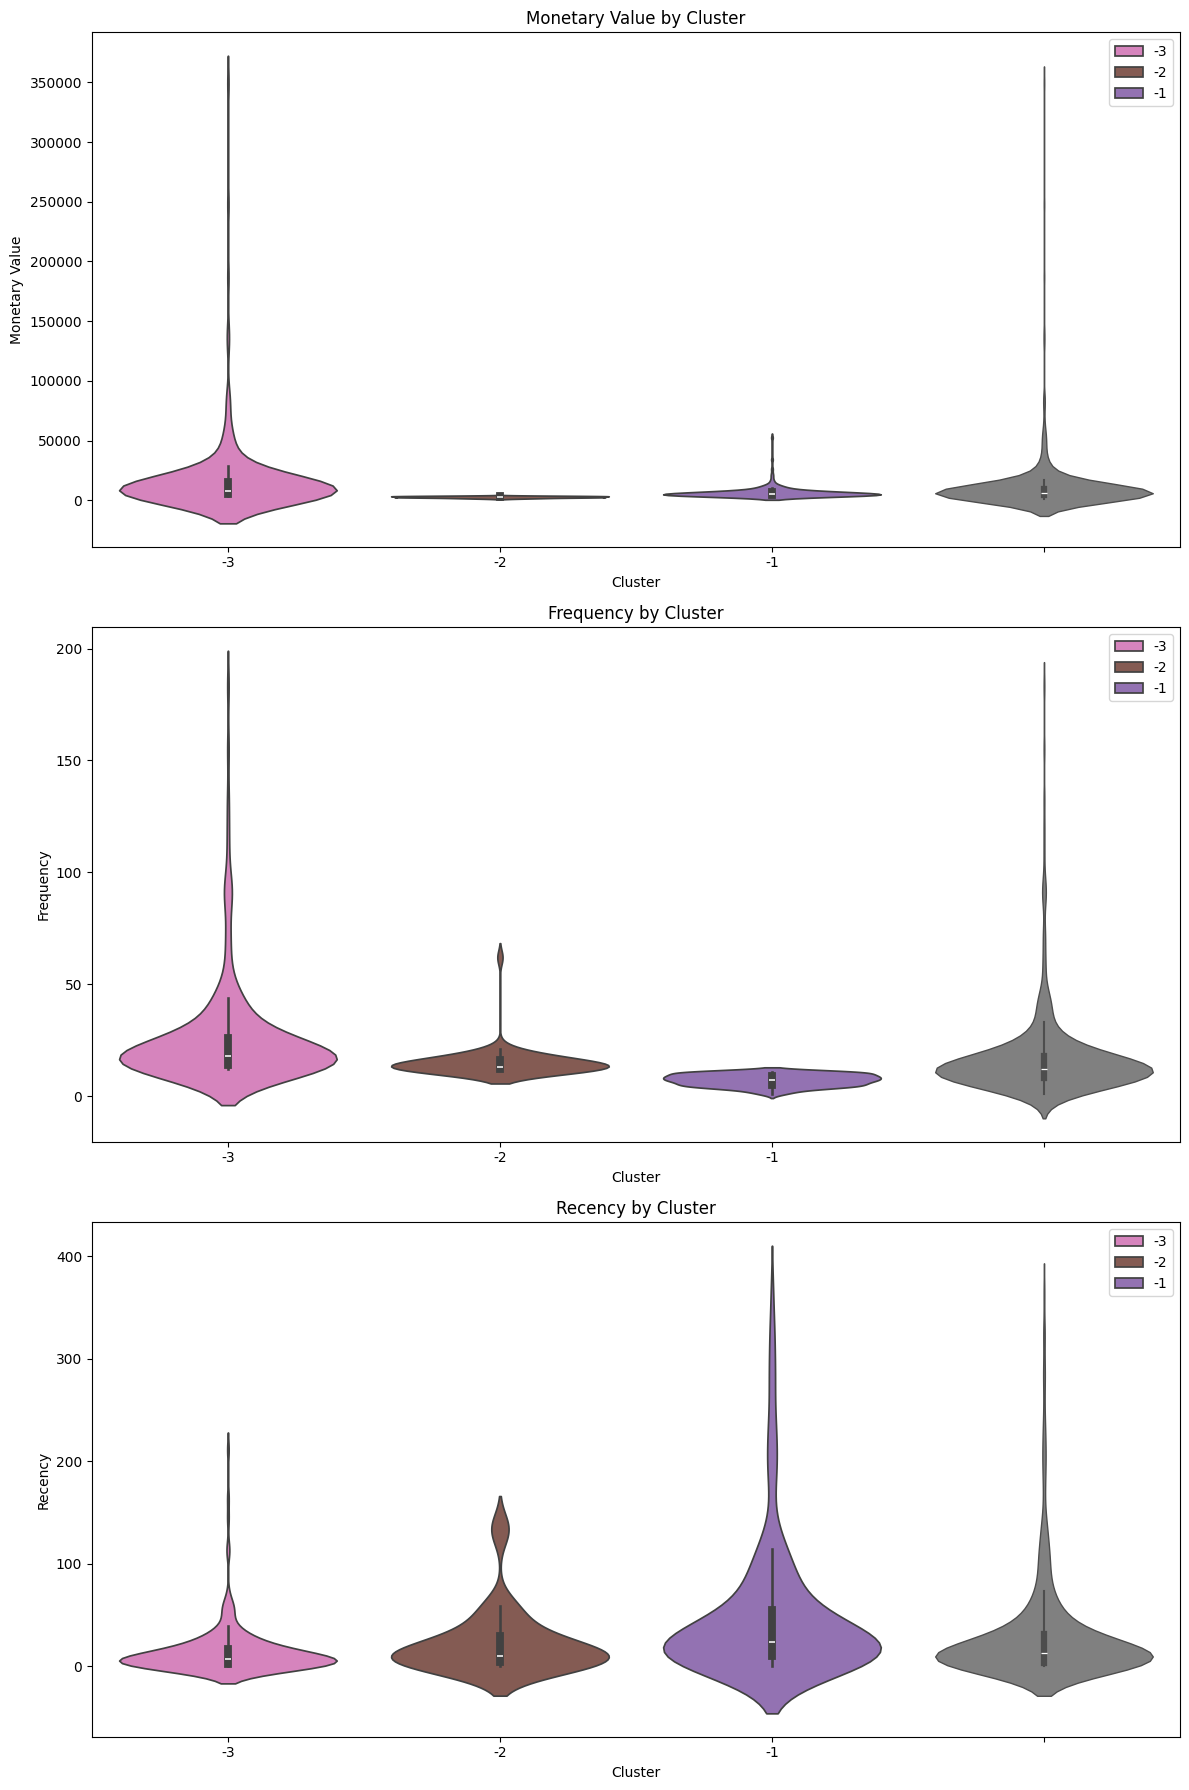

In [89]:
cluster_colors = {-1: '#9467bd',
                  -2: '#8c564b',
                  -3: '#e377c2'}

plt.figure(figsize=(12, 18))

plt.subplot(3, 1, 1)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['MonetaryValue'], palette=cluster_colors, hue=outlier_clusters_df["Cluster"])
sns.violinplot(y=outlier_clusters_df['MonetaryValue'], color='gray', linewidth=1.0)
plt.title('Monetary Value by Cluster')
plt.ylabel('Monetary Value')

plt.subplot(3, 1, 2)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['Frequency'], palette=cluster_colors, hue=outlier_clusters_df["Cluster"])
sns.violinplot(y=outlier_clusters_df['Frequency'], color='gray', linewidth=1.0)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')

plt.subplot(3, 1, 3)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['Recency'], palette=cluster_colors, hue=outlier_clusters_df["Cluster"])
sns.violinplot(y=outlier_clusters_df['Recency'], color='gray', linewidth=1.0)
plt.title('Recency by Cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()

1. Grupo -1 (Valores Monetários Atípicos): "Mimar"
- Pensamento: Gastadores altos, mas não necessariamente compradores frequentes. Suas compras são grandes, porém infrequentes.
- Ação: Concentrar-se em manter sua lealdade com ofertas personalizadas ou serviços de luxo que atendam à sua alta capacidade de gasto.

2. Grupo -2 (Valores de Frequência Atípicos): "Aumentar as Vendas"
- Pensamento: Compradores frequentes que gastam menos por compra. Esses clientes estão consistentemente engajados, mas podem se beneficiar de oportunidades de aumento de vendas.
- Ação: Implementar programas de fidelidade ou ofertas de pacotes para incentivar um gasto maior por visita, dada a sua frequência de engajamento.

3. Grupo -3 (Valores Monetários e de Frequência Atípicos): "Encantar" 
- Pensamento: Os valores atípicos mais valiosos, com gastos extremos e compras frequentes. Provavelmente são clientes de nível superior que exigem atenção especial. 
- Ação: Desenvolver programas VIP ou ofertas exclusivas para manter sua lealdade e incentivar o engajamento contínuo.

### Análise Final 

In [96]:
cluster_labels = {
  0: "Reter",
  1: "Reengajar",
  2: "Incentivar",
  3: "Recompensar",
  -1: "Mimar",
  -2: "Aum_Vendas",
  -3: "Encantar"
}

In [97]:
full_clustering_df = pd.concat([non_outliers_df, outlier_clusters_df])

full_clustering_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
0,12346.00,169.36,2,2010-06-28 13:53:00,164,1
1,12347.00,1323.32,2,2010-12-07 14:57:00,2,0
2,12348.00,221.16,1,2010-09-27 14:59:00,73,2
3,12349.00,2221.14,2,2010-10-28 08:23:00,42,0
4,12351.00,300.93,1,2010-11-29 15:23:00,10,2
...,...,...,...,...,...,...
4235,18223.00,7516.31,12,2010-11-17 12:20:00,22,-3
4236,18225.00,7545.14,15,2010-12-09 15:46:00,0,-3
4237,18226.00,6650.83,15,2010-11-26 15:51:00,13,-3
4241,18231.00,4791.80,23,2010-10-29 14:17:00,41,-3


In [98]:
full_clustering_df["ClusterLabel"] = full_clustering_df["Cluster"].map(cluster_labels)

full_clustering_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster,ClusterLabel
0,12346.00,169.36,2,2010-06-28 13:53:00,164,1,Reengajar
1,12347.00,1323.32,2,2010-12-07 14:57:00,2,0,Reter
2,12348.00,221.16,1,2010-09-27 14:59:00,73,2,Incentivar
3,12349.00,2221.14,2,2010-10-28 08:23:00,42,0,Reter
4,12351.00,300.93,1,2010-11-29 15:23:00,10,2,Incentivar
...,...,...,...,...,...,...,...
4235,18223.00,7516.31,12,2010-11-17 12:20:00,22,-3,Encantar
4236,18225.00,7545.14,15,2010-12-09 15:46:00,0,-3,Encantar
4237,18226.00,6650.83,15,2010-11-26 15:51:00,13,-3,Encantar
4241,18231.00,4791.80,23,2010-10-29 14:17:00,41,-3,Encantar


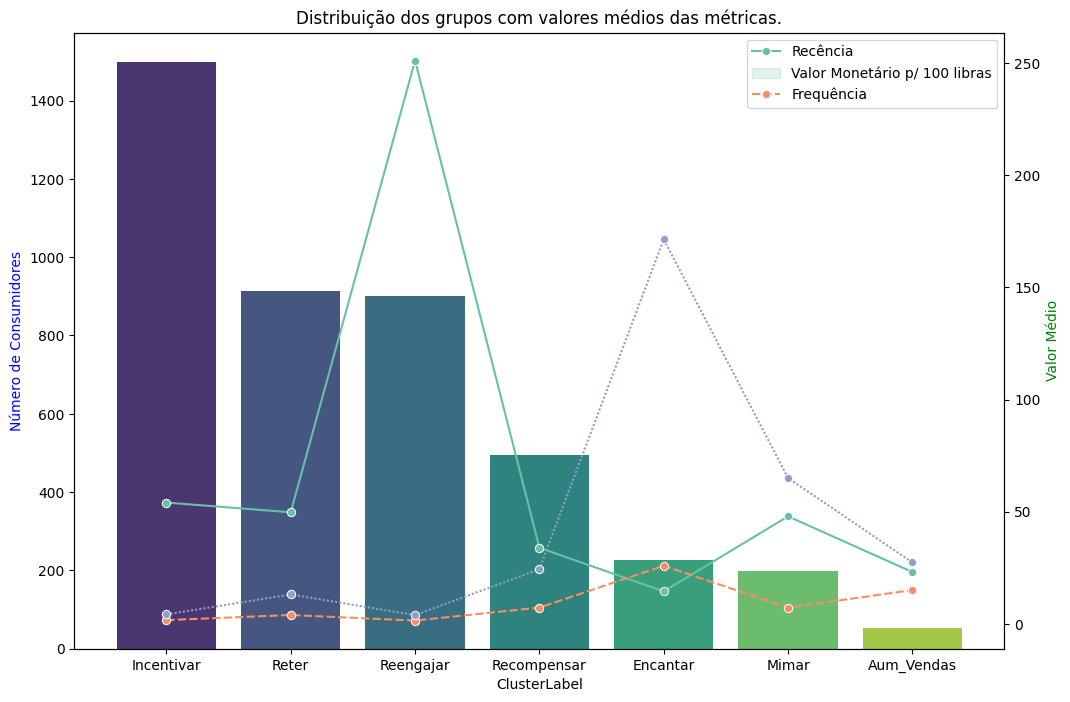

In [107]:
cluster_counts = full_clustering_df['ClusterLabel'].value_counts()
full_clustering_df[
  "MonetaryValue per 100 pounds"] = full_clustering_df["MonetaryValue"] / 100.00
feature_means = full_clustering_df.groupby('ClusterLabel')[
  ['Recency', 'Frequency', 'MonetaryValue per 100 pounds']].mean()

fig, ax1 = plt.subplots(figsize=(12, 8))

sns.barplot(x=cluster_counts.index, y=cluster_counts.values, ax=ax1,
            palette='viridis', hue=cluster_counts.index)

ax1.set_ylabel('Número de Consumidores', color='b')
ax1.set_title('Distribuição dos grupos com valores médios das métricas.')

ax2 = ax1.twinx()

sns.lineplot(data=feature_means, ax=ax2, palette='Set2', marker='o')
ax2.set_ylabel('Valor Médio', color='g')

ax2.legend(labels=["Recência", "Valor Monetário p/ 100 libras", "Frequência"])

plt.show()